In [1]:
import itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pairs = set([])
tau_vals = np.logspace(-1,2,10,base=10.0)
mLLP_vals = np.linspace(100.,1600.,20)
for mLLP, tau in itertools.product(mLLP_vals,tau_vals):
    tau = float('%1.2f' %tau)
    mLLP = int(mLLP)
    pairs.add((mLLP,tau))
pairs = sorted(list(pairs))
print(len(pairs))

200


In [3]:
print(pairs)

[(100, 0.1), (100, 0.22), (100, 0.46), (100, 1.0), (100, 2.15), (100, 4.64), (100, 10.0), (100, 21.54), (100, 46.42), (100, 100.0), (178, 0.1), (178, 0.22), (178, 0.46), (178, 1.0), (178, 2.15), (178, 4.64), (178, 10.0), (178, 21.54), (178, 46.42), (178, 100.0), (257, 0.1), (257, 0.22), (257, 0.46), (257, 1.0), (257, 2.15), (257, 4.64), (257, 10.0), (257, 21.54), (257, 46.42), (257, 100.0), (336, 0.1), (336, 0.22), (336, 0.46), (336, 1.0), (336, 2.15), (336, 4.64), (336, 10.0), (336, 21.54), (336, 46.42), (336, 100.0), (415, 0.1), (415, 0.22), (415, 0.46), (415, 1.0), (415, 2.15), (415, 4.64), (415, 10.0), (415, 21.54), (415, 46.42), (415, 100.0), (494, 0.1), (494, 0.22), (494, 0.46), (494, 1.0), (494, 2.15), (494, 4.64), (494, 10.0), (494, 21.54), (494, 46.42), (494, 100.0), (573, 0.1), (573, 0.22), (573, 0.46), (573, 1.0), (573, 2.15), (573, 4.64), (573, 10.0), (573, 21.54), (573, 46.42), (573, 100.0), (652, 0.1), (652, 0.22), (652, 0.46), (652, 1.0), (652, 2.15), (652, 4.64), (652, 

In [4]:
pairsStable = sorted(list(zip([int(m) for m in mLLP_vals],['inf']*len(mLLP_vals))))
print(pairsStable)

[(100, 'inf'), (178, 'inf'), (257, 'inf'), (336, 'inf'), (415, 'inf'), (494, 'inf'), (573, 'inf'), (652, 'inf'), (731, 'inf'), (810, 'inf'), (889, 'inf'), (968, 'inf'), (1047, 'inf'), (1126, 'inf'), (1205, 'inf'), (1284, 'inf'), (1363, 'inf'), (1442, 'inf'), (1521, 'inf'), (1600, 'inf')]


In [5]:
df = pd.read_pickle('../scanResults_Wino.pcl')

In [6]:
slope, intercept, r, p, se = stats.linregress(df['mLLP'], np.log10(df['Total xsec (pb)']*139.0*1e3*5))

In [7]:
print(intercept,slope)

6.349713209722852 -0.00318029082663901


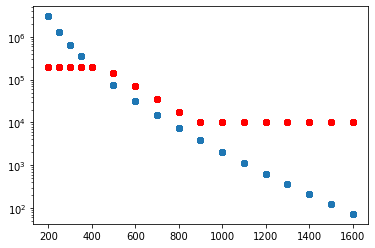

In [8]:
@np.vectorize
def nevts(m):      
    nLog = intercept + slope*m
    n = 10**nLog
    n = 2*min(100000,max(5000,10**(6.35 -0.003*m)))
    return n
    
plt.scatter(df['mLLP'],df['Total xsec (pb)']*139.0*1e3*10)
plt.scatter(df['mLLP'],nevts(df['mLLP']),c='red')
plt.yscale('log')
# plt.xscale('log')
plt.show()

In [9]:
df[['mLLP','Total xsec (pb)']]

,mLLP,Total xsec (pb)
0,200.0,2.195715
1,200.0,2.195715
2,250.0,0.953167
3,250.0,0.953167
4,200.0,2.195715
...,...,...
153,1600.0,0.000052
154,1600.0,0.000052
155,1600.0,0.000052
156,1600.0,0.000052
